# Descriptive Statistics


In [20]:
if (!requireNamespace("tidyverse", quietly = TRUE)) {
  install.packages("tidyverse")
}

if (!requireNamespace("skimr", quietly = TRUE)) {
  install.packages("skimr")
}

library(tidyverse)
library(readxl)

## A Very Short Introduction to R



In [21]:
1 + 4
3 - 2
2 * 8
2 / 8
2^4

[1] 5

[1] 1

[1] 16

[1] 0.25

[1] 16

In [22]:
y = 12

## Vectors


In [23]:
x = c(12, 43)

In [24]:
incomes = c(100, 200, 300, 400, 500)

# Mean, median,

## Pipes

For the values y = (2, 3, -5), compute:

$$
\sqrt{|\bar{y}|}
$$

using nested function calls and then using the pipe operator. Round the result to 2 decimal places using the `round()` function. The bar over the y means the average of the values in y.


In [25]:
# Nested


In [26]:
# Pipes


## Data Frames


In [27]:
# Create a tibble (a type of data frame)
dt <- tibble(
  ## Shorthand syntax for creating a sequence of integers from one to five
  id = 1:5,
  name = c("Alice", "Bob", "Charlie", "David", "Eve"),
  billableHours = c(2, 2.5, 3, 8, 12)
)

# Print the data
dt

id,name,billableHours
<int>,<chr>,<dbl>
1,Alice,2.0
2,Bob,2.5
3,Charlie,3.0
4,David,8.0
5,Eve,12.0


Create a data frame with two columns, `name` and `age`, and three rows of data. The names should be "Al", "Bob", and "Charlie", and their ages should be 25, 30, and 35, respectively. Store the data frame in a variable called `people`.


## Importing Data

Columns (variables) in the dataset:

-   `timestamp` - timestamp field for grouping the data
-   `cnt` - the count of a new bike shares
-   `t1` - real temperature in degrees Fahrenheit
-   `t2` - temperature in degrees Fahrenheit (feels like)
-   `hum` - humidity in percentage
-   `wind_speed` - wind speed in miles per hour
-   `weather_code` - category of the weather
-   `is_holiday` - boolean field - 1 holiday / 0 non holiday
-   `is_weekend` - boolean field - 1 if the day is weekend
-   `season` - category field meteorological seasons: 0-spring ; 1-summer; 2-fall; 3-winter.

In [28]:
# Download and import the raw data from a CSV file
bikes <- read_csv("https://github.com/febse/data/raw/refs/heads/main/econ/bike_sharing_london_merged.xls") |>
  mutate(
    t1 = (t1 * 1.8) + 32,
    t2 = (t2 * 1.8) + 32,
    wind_speed = wind_speed * 1.60934
  ) |>
  select(timestamp, t1, t2, wind_speed, cnt, season)

# Print the first few lines
bikes |> head()

Rows: 17414 Columns: 10
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl  (9): cnt, t1, t2, hum, wind_speed, weather_code, is_holiday, is_weekend...
dttm (1): timestamp

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


timestamp,t1,t2,wind_speed,cnt,season
<dttm>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2015-01-04 00:00:00,37.4,35.6,9.65604,182,3
2015-01-04 01:00:00,37.4,36.5,8.04670,138,3
2015-01-04 02:00:00,36.5,36.5,0.00000,134,3
2015-01-04 03:00:00,35.6,35.6,0.00000,72,3
2015-01-04 04:00:00,35.6,32.0,10.46071,47,3
2015-01-04 05:00:00,35.6,35.6,6.43736,46,3


In [29]:
bikes |> nrow()

[1] 17414

In [30]:
bikes |> summary()

   timestamp                            t1              t2       
 Min.   :2015-01-04 00:00:00.00   Min.   :29.30   Min.   :21.20  
 1st Qu.:2015-07-04 20:15:00.00   1st Qu.:46.40   1st Qu.:42.80  
 Median :2016-01-03 15:30:00.00   Median :54.50   Median :54.50  
 Mean   :2016-01-03 22:31:00.56   Mean   :54.44   Mean   :52.74  
 3rd Qu.:2016-07-04 15:45:00.00   3rd Qu.:60.80   3rd Qu.:60.80  
 Max.   :2017-01-03 23:00:00.00   Max.   :93.20   Max.   :93.20  
   wind_speed         cnt           season     
 Min.   : 0.00   Min.   :   0   Min.   :0.000  
 1st Qu.:16.09   1st Qu.: 257   1st Qu.:0.000  
 Median :24.14   Median : 844   Median :1.000  
 Mean   :25.61   Mean   :1143   Mean   :1.492  
 3rd Qu.:32.99   3rd Qu.:1672   3rd Qu.:2.000  
 Max.   :90.93   Max.   :7860   Max.   :3.000  

# Creating new columns

$$
\text{Degree Celsius} = \frac{\text{Degree Fahrenheit} - 32}{1.8}
$$

In [31]:
bikes |> 
    mutate(
        temp_c = (t1 - 32) / 1.8,
    )

timestamp,t1,t2,wind_speed,cnt,season,temp_c
<dttm>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2015-01-04 00:00:00,37.4,35.6,9.65604,182,3,3.0
2015-01-04 01:00:00,37.4,36.5,8.04670,138,3,3.0
2015-01-04 02:00:00,36.5,36.5,0.00000,134,3,2.5
2015-01-04 03:00:00,35.6,35.6,0.00000,72,3,2.0
2015-01-04 04:00:00,35.6,32.0,10.46071,47,3,2.0
2015-01-04 05:00:00,35.6,35.6,6.43736,46,3,2.0
2015-01-04 06:00:00,33.8,30.2,11.26538,51,3,1.0
2015-01-04 07:00:00,33.8,30.2,11.26538,75,3,1.0
2015-01-04 08:00:00,34.7,30.2,12.87472,131,3,1.5


Create two new columns in the bikes data frame: `ws_kmph` and `cnt_hundreds`. The first column should convert the `wind_speed` from miles per hour to kilometers per hour (1 mile = 1.60934 km), and the second column should represent the count of new bike shares (`cnt`) divided by 100. Use a comma to separate the declarations of the two new columns in a single `mutate()` call. Make sure to overwrite the original `bikes` data frame with the new columns included.


## Location: the Mean and the Median

$$
\bar{x} = \frac{1}{n} \sum_{i=1}^{n} x_i = \frac{x_1 + x_2 + \ldots + x_n}{n}
$$


In [32]:
mean(bikes$cnt)

[1] 1143.102

In [33]:
median(bikes$cnt)

[1] 844

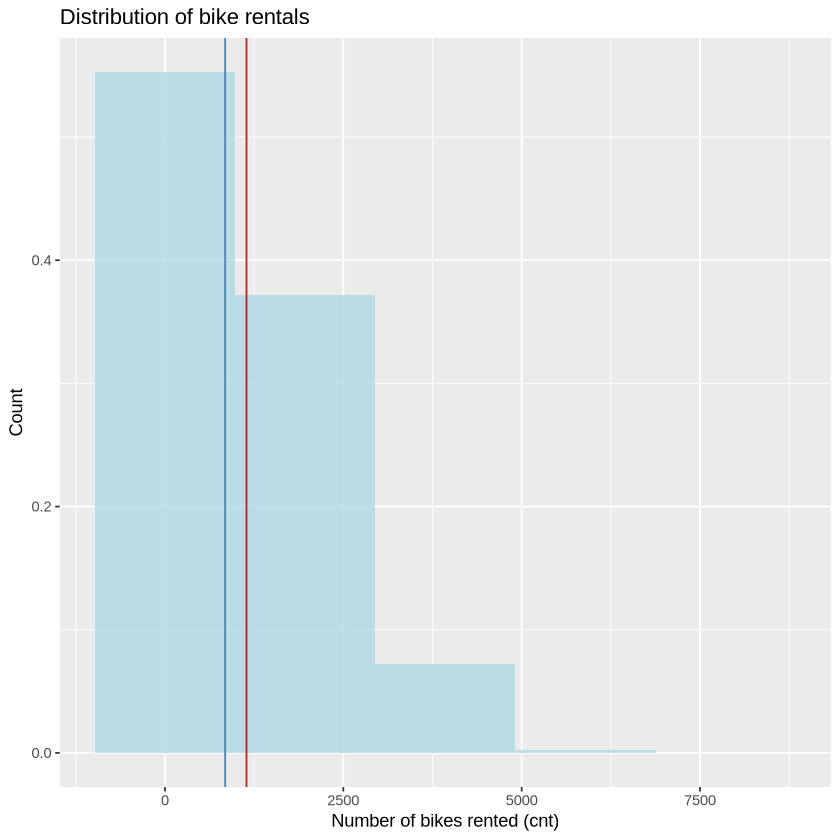

In [ ]:
bikes |> 
    ggplot(aes(x = cnt)) +
    geom_histogram(bins = 5, fill = "lightblue", alpha = 0.8) + 
    geom_vline(xintercept = mean(bikes$cnt), color = "firebrick") +
    geom_vline(xintercept = median(bikes$cnt), color = "steelblue") + 
    labs(title = "Distribution of bike rentals", x = "Number of bikes rented (cnt)", y = "Count")

In [69]:
bikes$cnt |> summary()

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
      0     257     844    1143    1672    7860 

## Variance and Standard Deviation

The population (uncorrected) variance of a variable $x$ is defined as:

$$
\sigma_x^2 = \frac{1}{N} \sum_{i=1}^{n} (x_i - \mu_x)^2 = \frac{1}{N - \underbrace{0}_{\text{ddof}}} \sum_{i=1}^{n} (x_i - \mu_x)^2
$$

where $\mu_x$ is the population mean of $x$ and $N$ is the population size. The population mean is assumed to be known (a fixed constant that is not estimated from the data).

The formula above is a compact way of writing the following:

$$
\sigma_x^2 = \frac{1}{N} \left[ (x_1 - \mu_x)^2 + (x_2 - \mu_x)^2 + \ldots + (x_n - \mu_x)^2 \right]
$$

The (population) standard deviation of $x$ is the square root of the population variance:

$$
\sigma_x = \sqrt{\sigma_x^2}
$$

In [70]:
y <- c(2, 5, 3)

In [71]:
# The variance of a column 

?var

cor                   package:stats                    R Documentation

_C_o_r_r_e_l_a_t_i_o_n, _V_a_r_i_a_n_c_e _a_n_d _C_o_v_a_r_i_a_n_c_e (_M_a_t_r_i_c_e_s)

_D_e_s_c_r_i_p_t_i_o_n:

     ‘var’, ‘cov’ and ‘cor’ compute the variance of ‘x’ and the
     covariance or correlation of ‘x’ and ‘y’ if these are vectors.  If
     ‘x’ and ‘y’ are matrices then the covariances (or correlations)
     between the columns of ‘x’ and the columns of ‘y’ are computed.

     ‘cov2cor’ scales a covariance matrix into the corresponding
     correlation matrix _efficiently_.

_U_s_a_g_e:

     var(x, y = NULL, na.rm = FALSE, use)
     
     cov(x, y = NULL, use = "everything",
         method = c("pearson", "kendall", "spearman"))
     
     cor(x, y = NULL, use = "everything",
         method = c("pearson", "kendall", "spearman"))
     
     cov2cor(V)
     
_A_r_g_u_m_e_n_t_s:

       x: a numeric vector, matrix or data frame.

       y

In [72]:
median(bikes$cnt)

[1] 844

[1] 16.33746

[1] 2

90%   99% 99.9% 
   16   128  2048

`stat_bin()` using `bins = 30`. Pick better value `binwidth`.


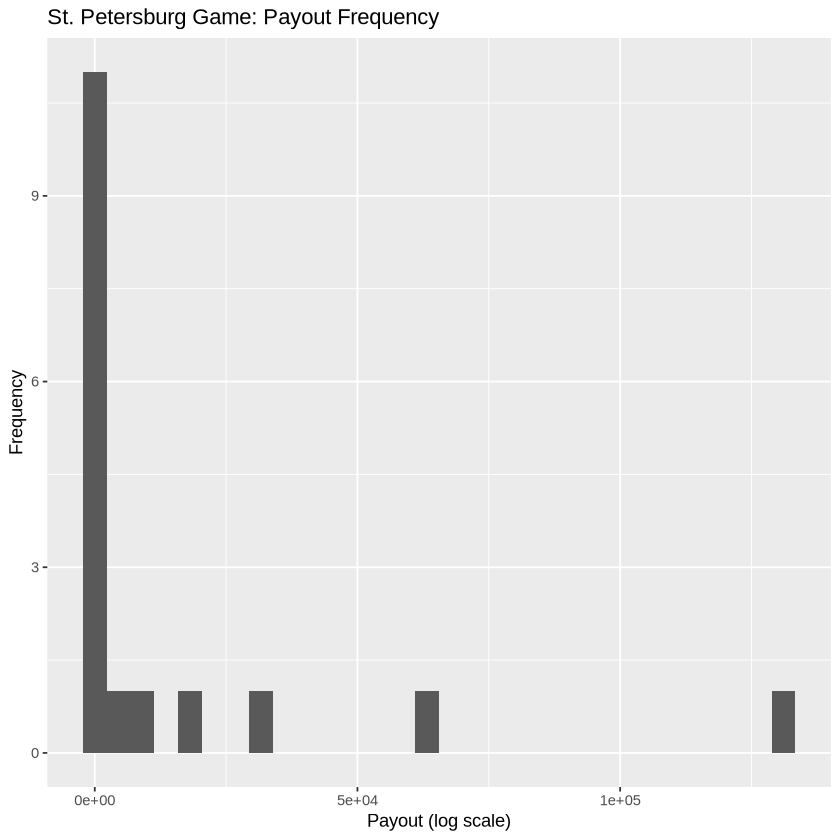

In [73]:
# Simulate the St. Petersburg game

st_petersburg_payout <- function() {
    k <- 1
    while (runif(1) > 0.5) {
        k <- k + 1
    }
    2^k
}

n_games <- 100000
payouts <- replicate(n_games, st_petersburg_payout())

payouts_tbl <- tibble(payout = payouts)

mean(payouts_tbl$payout)
median(payouts_tbl$payout)
quantile(payouts_tbl$payout, probs = c(0.9, 0.99, 0.999))

payout_freq <- payouts_tbl |>
    count(payout)

ggplot(payout_freq, aes(x = payout)) +
    geom_histogram(aes(x = payout)) +
    labs(
        title = "St. Petersburg Game: Payout Frequency",
        x = "Payout (log scale)",
        y = "Frequency"
    )

In [74]:
payouts |> summary()

     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
     2.00      2.00      2.00     16.34      4.00 131072.00 

In [75]:
payouts |> quantile(probs = c(0.9, 0.99, 0.999, 0.9999))

90%    99%  99.9% 99.99% 
    16    128   2048   8192

In [76]:
2^10

[1] 1024